In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load data

In [3]:
df = pd.read_csv('kc_house_data_NaN.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Drop unused data

In [4]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace=True)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check null values

In [6]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Replace null values to mean of that column

In [7]:
df['bedrooms'] = df['bedrooms'].replace(np.nan, df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].replace(np.nan, df['bathrooms'].mean())

Now we have replaced null data

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Display correlation between price column and remaining columns

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Drop zipcode, because it has less correlation between price

In [10]:
df.drop(['zipcode'], axis = 1, inplace = True)

Convert date to years, months

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

Display correlation between price column and remaining columns

In [11]:
df.corr()['price'].sort_values()

long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Data Visualization House price vs months and years

KeyError: 'month'

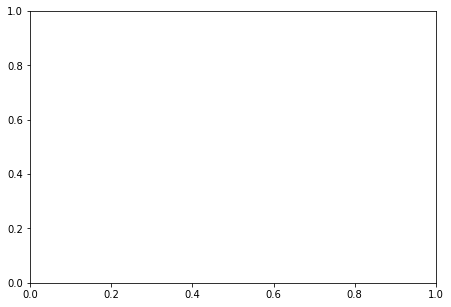

In [12]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
df.groupby('month').mean()['price'].plot()
plt.title('Mean prices in every month')
plt.ylabel('Avg Prices')
fig.add_subplot(1,2,2)
df.groupby('year').mean()['price'].plot()
plt.title('Mean prices in 2014-2015 ')

Scatterplot for square foot of (living, lot, above and basement) with price

In [ ]:
fig = plt.figure(figsize=(16,9))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price'], color = 'r')
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'], color = 'g')
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price'], color = 'y')

Regressionplot for square foot of (living, lot, above and basement) with price

C:\Users\AJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


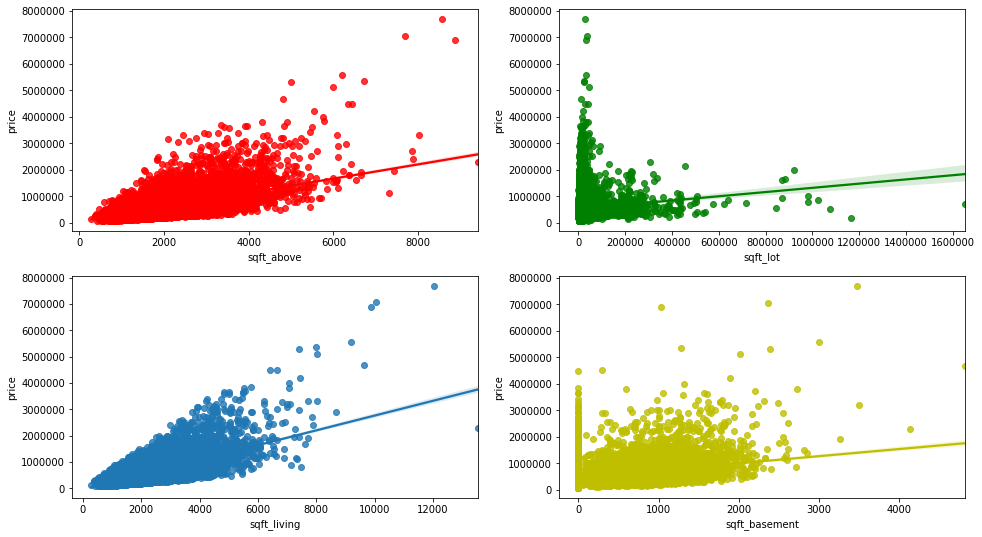

In [13]:
fig = plt.figure(figsize=(16,9))
fig.add_subplot(2,2,1)
sns.regplot(df['sqft_above'], df['price'], color = 'r')
fig.add_subplot(2,2,2)
sns.regplot(df['sqft_lot'],df['price'], color = 'g')
fig.add_subplot(2,2,3)
sns.regplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.regplot(df['sqft_basement'],df['price'], color = 'y')

Countplot for bedrooms, bathrooms, floors, grade

C:\Users\AJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\AJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\AJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\AJAY\anaconda3\lib\site-pack

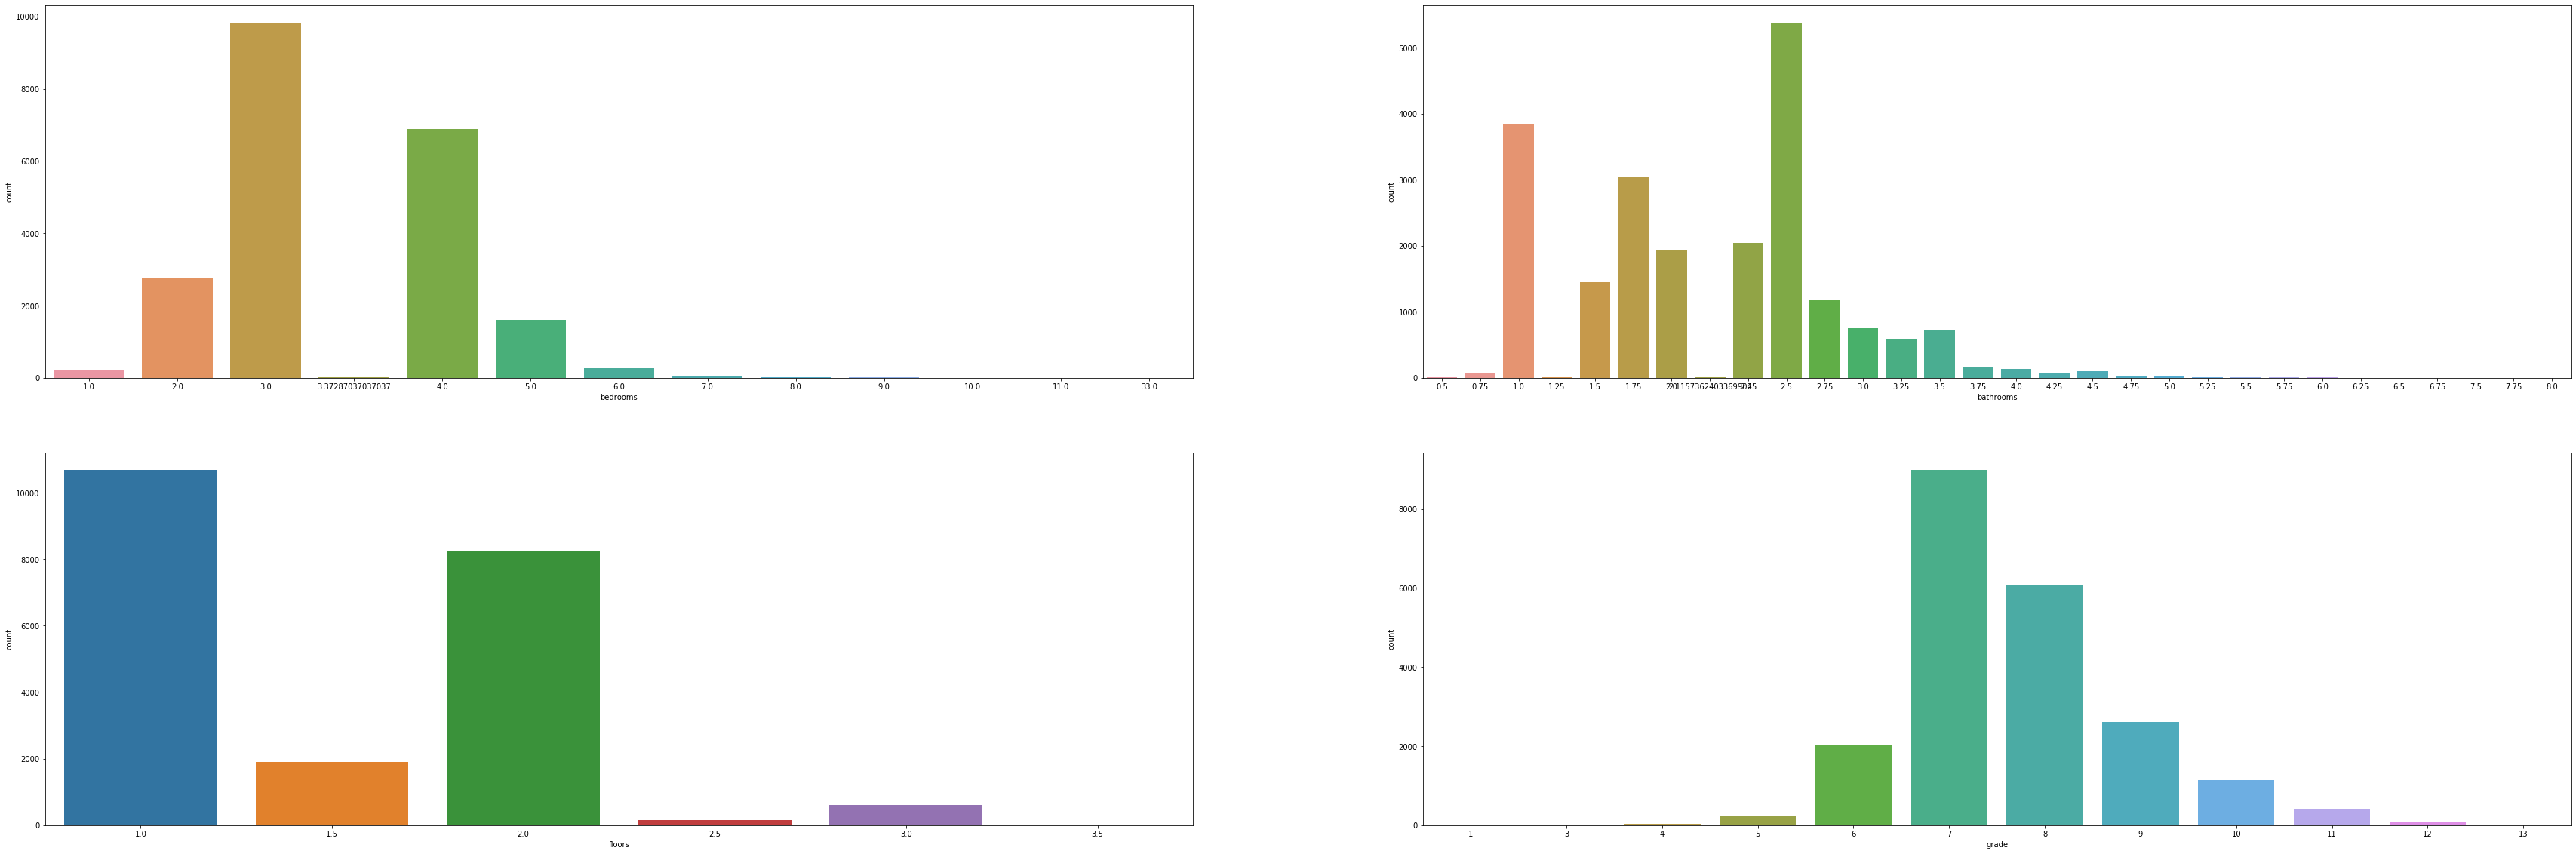

In [14]:
fig = plt.figure(figsize=(60, 20))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,3)
sns.countplot(df['floors'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])

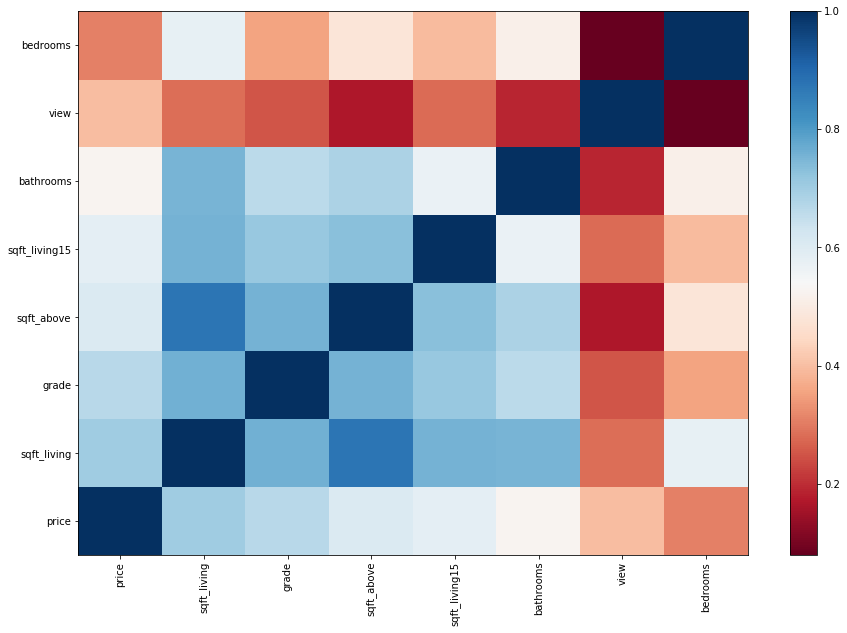

In [16]:
multiples = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms']
df_corr = df[multiples].corr()

fig, ax = plt.subplots(figsize=(15, 10))
im = ax.pcolor(df_corr, cmap='RdBu')

#label names
row_labels = df_corr.columns
col_labels = df_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [15]:
df.drop(['date'], axis = 1, inplace = True)

# Multiple Regression

Taking whole data for prediction

In [16]:
X = df.drop('price',axis = 1)
Y = df['price']

fitting full data set and predicting same dataset

In [17]:
lm = LinearRegression()
lm.fit(X, Y)
yhat = lm.predict(X)
lm.score(X, Y)

0.6954211480669568

In [18]:
def RelationPlot(Y, yhat):
    width = 12; height = 10
    plt.figure(figsize=(width, height))
    
    
    ax1 = sns.kdeplot(Y, color="r", label="Actual Value")
    plt.legend()
    sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()
    
    
    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price of House')
    plt.ylabel('Density')
    
    plt.show()
    plt.close()

Plot of yhat and Y means (predicted data and Actual data)

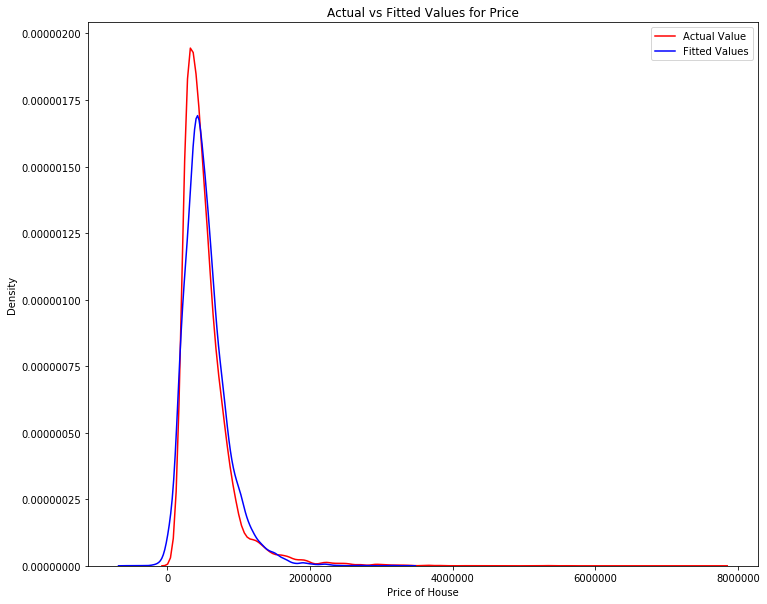

In [19]:
RelationPlot(Y, yhat)

Here in above graph we have observed a slight high in actual value and now we try to do some more reggression to reduce that gap and to increase accuracy.

## Pipeline

Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

StandardScaler means data converts into the form that mean zero and unit variance.

Now we create a pipleline with StandardScalar, PolynomialFeatures and LinearRegression

In [24]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree = 3, include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor

In [25]:
pipe=Pipeline(Input)
pipe.fit(X, Y)
ypipe = pipe.predict(X)
pipe.score(X, Y)

0.8877506599865772

Plot of ypipe and Y means (predicted data and Actual data)

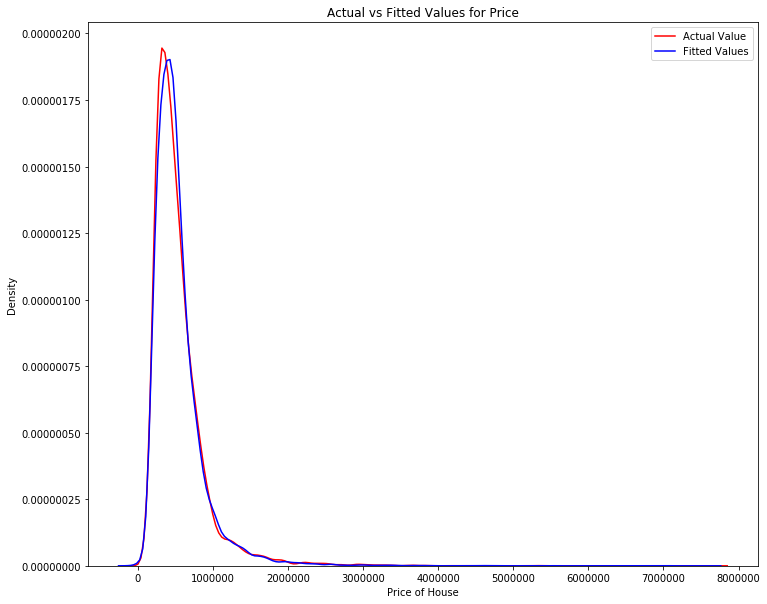

In [26]:
RelationPlot(Y, ypipe)

# Training and Testing

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [27]:
from sklearn.model_selection import train_test_split

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=43)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 7133
number of training samples: 14480


In [29]:
lre=LinearRegression()
lre.fit(X_train, Y_train)
Y_hat = lre.predict(X_test)
lre.score(X_test, Y_test)

0.6864000777170196

Let's examine the distribution of the predicted values of the testing data.

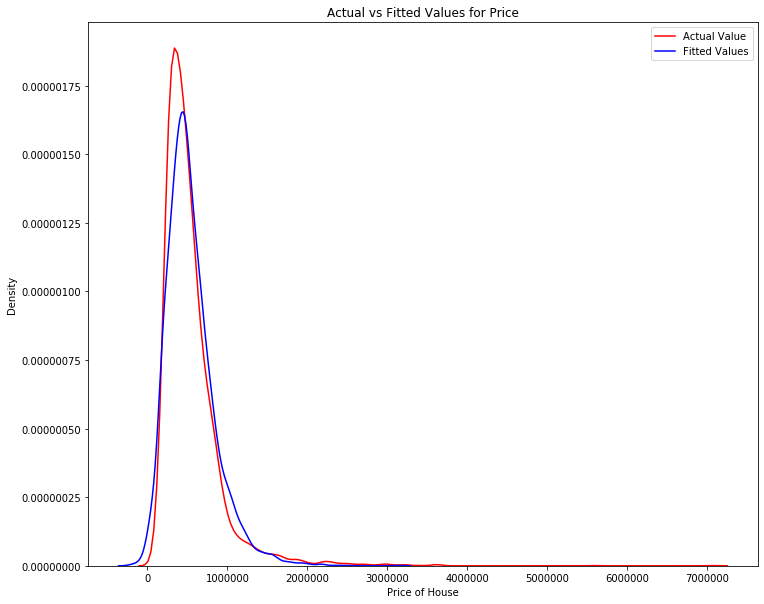

In [30]:
RelationPlot(Y_test, Y_hat)

### Grid Search

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

create parameters

In [32]:
parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [33]:
RR=Ridge()
Grid = GridSearchCV(RR, parameters1,cv=4)
Grid.fit(X_train, Y_train)

C:\Users\AJAY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.41607e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AJAY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.84886e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AJAY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.27e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AJAY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.34765e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [33]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=1)

 We now test our model on the test data.

In [34]:
BestRR.score(X_test, Y_test)

0.6883204144900803

## Pipeline

StandardScaler means data converts into the form that mean zero and unit variance.
Now we create a pipleline with StandardScalar, PolynomialFeatures and LinearRegression

In [37]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2, include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor

In [38]:
pipe=Pipeline(Input)
pipe.fit(X_train, Y_train)
ypipe = pipe.predict(X_test)
pipe.score(X_test, Y_test)

0.7987191156034161

Plot of ypipe and Y means (predicted data and Actual data)

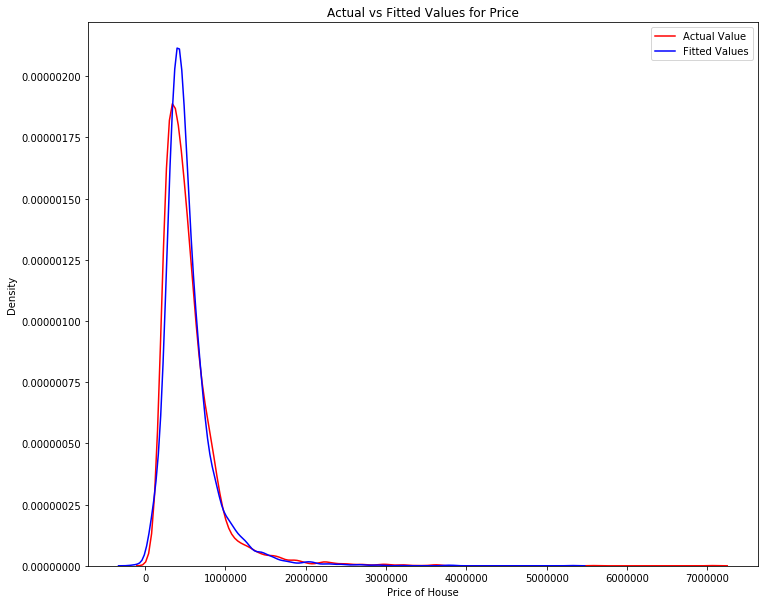

In [37]:
RelationPlot(Y_test, ypipe)

In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, ypipe))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, ypipe))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, ypipe)))
print('Variance Score:',metrics.explained_variance_score(Y_test, ypipe))

Mean Absolute Error: 103910.02900252349
Mean Squared Error: 26683643622.06229
Root Mean Squared Error: 163351.289012552
Variance Score: 0.8005859108827531


### Visualizing Residuals

C:\Users\AJAY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


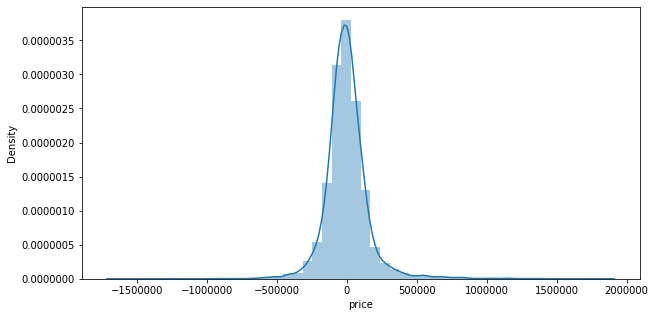

In [39]:
fig = plt.figure(figsize=(10, 5))
Residuals = (Y_test - ypipe)
sns.distplot(Residuals)

 Visualizing Our predictions

C:\Users\AJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


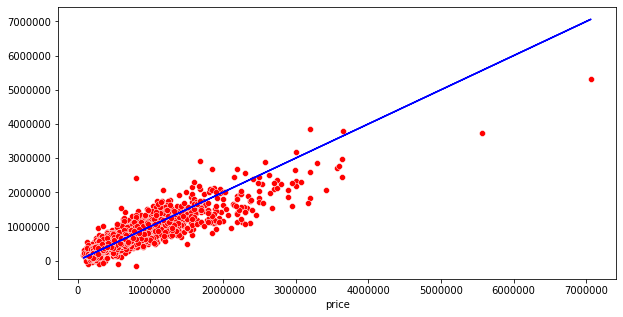

In [40]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(Y_test, ypipe, color = 'r')
plt.plot(Y_test, Y_test, 'b')

In [41]:
df.shape

(21613, 20)

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [43]:
df.to_csv('Housing_with_month.csv')